#  Computer Vision Project 2
The objective of this project is to implement the idea of histogram matching. In the class you learned the
concept of histogram equalization for enhancing the contrast and quality of images. Another idea for
image enhancement is to transform an image histogram such that it matches the histogram of a target
image. A comprehensive example is given in the lecture notes. I ask you to implement the idea of
histogram matching in Matlab or OpenCV and apply and evaluate it with the Matlab/OpenCV built-in
imhistmatch() function. There are two approaches to solve this problem. one Since in your
implementation you first need to equalize the histogram of your source and target image you need to
either:

a) implement the histogram equalization technique/algorithm
b) use the built-in histeq()function.

If you decide to pursue option a), you will get extra bonus (10 points) in this project.


## Import Libraries
First, we import the nesssecary libraries for this project. We will be using OpenCV, Numpy, Matplotlib, and

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import equalize_hist

## Histogram Matching Function

In [2]:
def compute_cdf(image):
    hist, _ = np.histogram(image.flatten(), 256, [0, 256], density=True)
    cdf = hist.cumsum()
    cdf = (255 * cdf / cdf[-1]).astype(np.uint8)
    return cdf

def hist_match(source, template):
    src_cdf = compute_cdf(source)
    tar_cdf = compute_cdf(template)

    src_matched = np.interp(source.flatten(), np.arange(256), src_cdf)
    tar_matched = np.interp(src_matched, tar_cdf, np.arange(256))

    return tar_matched.reshape(source.shape)


## Display Images Function

In [3]:
def plot_images(img_list, titles, figsize=(15, 5)):
    fig, axes = plt.subplots(1, len(img_list), figsize=figsize)
    for ax, img, title in zip(axes, img_list, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

## Load Images and do histogram matching/equalization

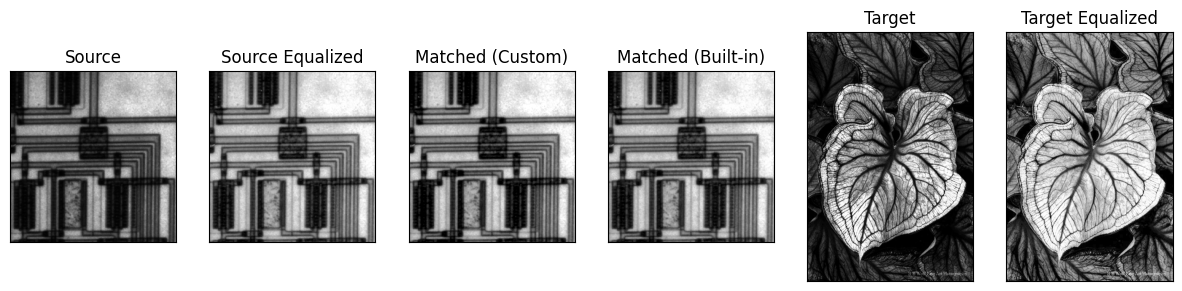

In [4]:
# Load source and target images
source = cv2.imread('circuit.tif', 0)
target = cv2.imread('test1.jpg', 0)

# Perform histogram equalization
source_equalized = cv2.equalizeHist(source)
target_equalized = cv2.equalizeHist(target)

# Perform histogram matching
matched_image = hist_match(source_equalized, target_equalized)

# Compare with built-in function
source_float = source / 255.0
matched_image_builtin = equalize_hist(source_float)
matched_image_builtin = (matched_image_builtin * 255).astype(np.uint8)

# Display images and histograms
plot_images([source, source_equalized, matched_image, matched_image_builtin,target,target_equalized],
            ['Source', 'Source Equalized', 'Matched (Custom)', 'Matched (Built-in)','Target','Target Equalized'])


## Visualizing the Image Histograms


In [5]:
def plot_histograms(img_list, titles, figsize=(15, 5)):
    fig, axes = plt.subplots(1, len(img_list), figsize=figsize)
    for ax, img, title in zip(axes, img_list, titles):
        ax.hist(img.ravel(), bins=256, range=(0, 256))
        ax.set_title(title)
        ax.set_xlim([0, 256])
    plt.show()


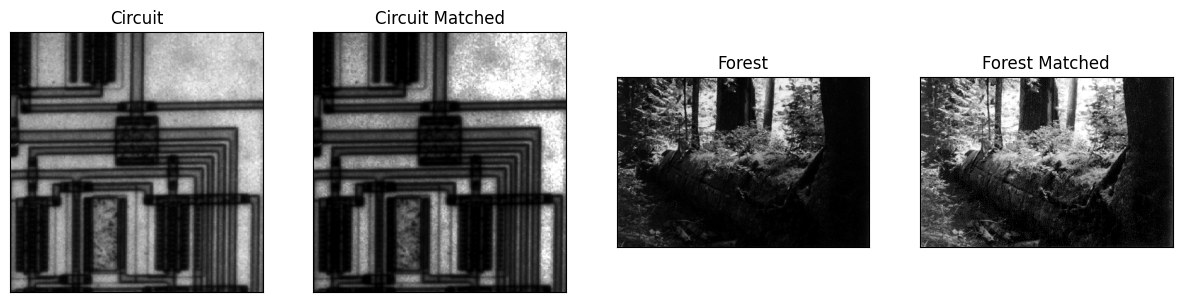

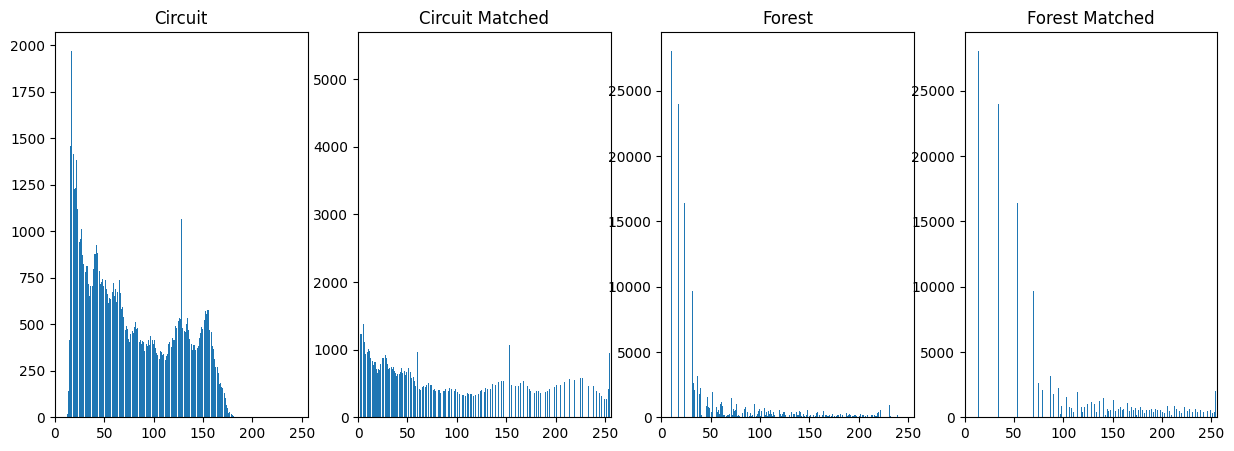

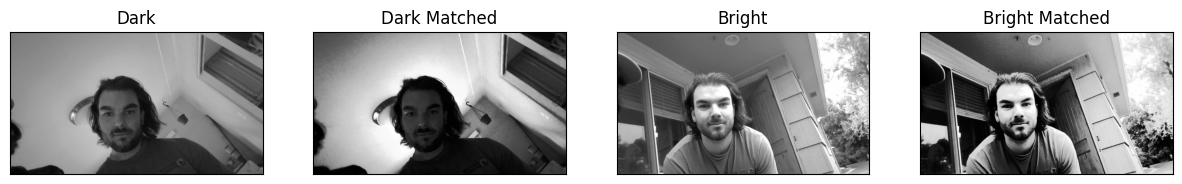

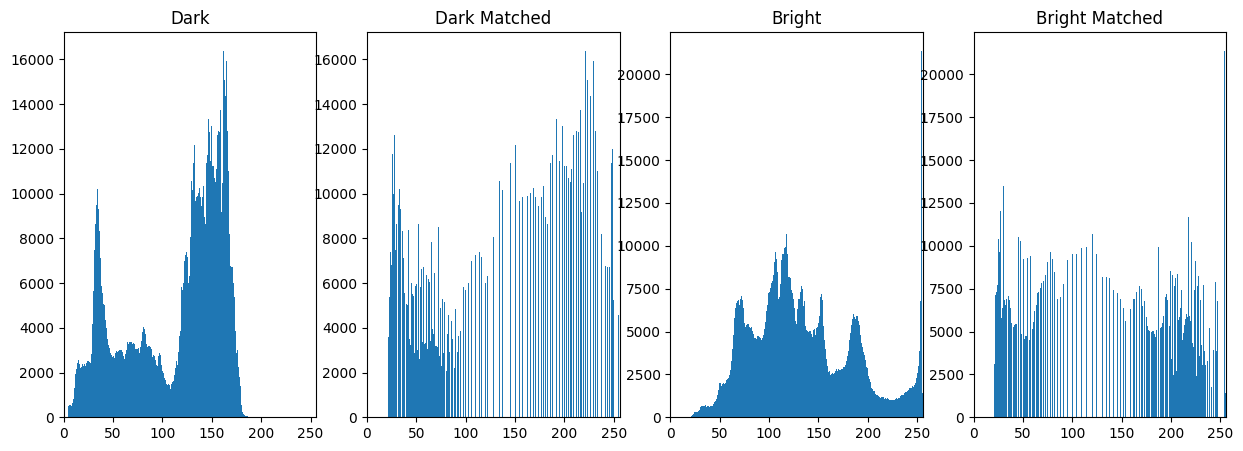

In [13]:
# Load images
circuit = cv2.imread('circuit.tif', 0)
forest = cv2.imread('forest.tif', 0)
dark = cv2.imread('dark.jpg', 0)
bright = cv2.imread('bright.jpg', 0)
test1 = cv2.imread('test1.jpg', 0)
test2 = cv2.imread('test2.jpg', 0)

# Perform histogram matching
circuit_matched = hist_match(circuit, test1)
forest_matched = hist_match(forest, test1)
dark_matched = hist_match(dark, test2)
bright_matched = hist_match(bright, test2)

# Display images and histograms
plot_images([circuit, circuit_matched, forest, forest_matched],
            ['Circuit', 'Circuit Matched', 'Forest', 'Forest Matched'])
plot_histograms([circuit, circuit_matched, forest, forest_matched],
                ['Circuit', 'Circuit Matched', 'Forest', 'Forest Matched'])

plot_images([dark, dark_matched, bright, bright_matched],
            ['Dark', 'Dark Matched', 'Bright', 'Bright Matched'])
plot_histograms([dark, dark_matched, bright, bright_matched],
                ['Dark', 'Dark Matched', 'Bright', 'Bright Matched'])


## Histogram Matching on Color Images

Histogram matching can be applied to color images by performing histogram matching independant on each channel after transforming it into a different color space.